<a href="https://colab.research.google.com/github/urness/CS167Fall22Code/blob/main/Day08_Notes_Metrics_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Example code from CS 167 on September 22, 2022


# Metrics and Testing
Let's use the iris dataset and see how accurate our kNN model is.

In [ ]:
import pandas
import numpy
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pandas.read_csv('/content/drive/MyDrive/CS167Fall22/Datasets/irisData.csv') #change this line to point to your data
#shuffle the data - "sampling" the full set in random order
shuffled_data = data.sample(frac=1, random_state=41)
#use the first 20 rows in the shuffled set as testing data #train with the rest
test_data = shuffled_data.iloc[0:25]
train_data = shuffled_data.iloc[25:]

In [ ]:
# take a look at the testing_data
print("testing data shape:", test_data.shape)
test_data.head()

testing data shape: (20, 5)


,sepal length,sepal width,petal length,petal width,species
119,6.0,2.2,5.0,1.5,Iris-virginica
128,6.4,2.8,5.6,2.1,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
91,6.1,3.0,4.6,1.4,Iris-versicolor
112,6.8,3.0,5.5,2.1,Iris-virginica


In [ ]:
# take a look at the training_data
print("training data shape:", train_data.shape)
train_data.head()

training data shape: (130, 5)


,sepal length,sepal width,petal length,petal width,species
81,5.5,2.4,3.7,1.0,Iris-versicolor
120,6.9,3.2,5.7,2.3,Iris-virginica
43,5.0,3.5,1.6,0.6,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
64,5.6,2.9,3.6,1.3,Iris-versicolor


In [ ]:
def classify_kNN(new_example,train_data,k):
    # outputs the most commonly-occuring (mode) species of the closeset k training examples 
    # designed to work on the iris data set
    train_data_copy = train_data.copy() #use a copy of the training set just so we don't mess up the original
    train_data_copy['distance_to_new'] = numpy.sqrt(
        (new_example['petal length']-train_data_copy['petal length'])**2
        +(new_example['sepal length']-train_data_copy['sepal length'])**2
        +(new_example['petal width']-train_data_copy['petal width'])**2
        +(new_example['sepal width']-train_data_copy['sepal width'])**2)
    sorted_data = train_data_copy.sort_values(['distance_to_new'])
    #mode() will return most common thing in the closest k examples in the sorted dataframe; iloc will get the actual string of the species
    prediction = sorted_data.iloc[0:k]['species'].mode().iloc[0] 
    return prediction

In [ ]:
def accuracy(actual,predicted):
    # INPUT: 
    #   actual: a list of values
    #   predicted: a list of value
    #   (we assume that number of elements in actual and predicted match)
    # OUTPUT: 
    #   the percentage in which predicted & actual values match
    num_correct = 0
    for i in range(len(actual)):
      if actual.iloc[i] == predicted.iloc[i]:
        num_correct +=1
    frac_correct = num_correct/len(actual)
    return frac_correct

# Exercise #1
fill in the code where you see ####

In [ ]:
def classify_all_kNN(test_data, train_data, k):
    # INPUT:
    #   test_data: a dataframe of the testing data set
    #   train_data: a dataframe of the training data set
    #   k: an integer
    # OUTPUT:
    #   a pandas.Series of the predicted results
    # for each item in the test_data list, apply the classify_kNN function (also passing the train_data and k)
    # return a pandas.Series of the predicted results
    results = []
    for i in range(len(test_data)):
      #### get a prediction from kNN for test_data at position i
      prediction = classify_kNN(test_data.iloc[i],train_data,k)
      #### add that prediction to the results list
      results.append(prediction)
    return pandas.Series(results)


In [ ]:
# get a list of predictions using 5-NN
predictions5NN = classify_all_kNN(test_data,train_data,5)

# print out the ACTUAL vs. PREDICTIONS for our testing data
print('ACTUAL\t\tPREDICTIONS')
for i in range(len(test_data)):
    print(test_data['species'].iloc[i], "---", predictions5NN.iloc[i] )

# print out the accuracy...
acc = accuracy(test_data['species'],predictions5NN)
print("accuracy:", acc)

ACTUAL		PREDICTIONS
Iris-virginica --- Iris-virginica
Iris-virginica --- Iris-virginica
Iris-virginica --- Iris-virginica
Iris-versicolor --- Iris-versicolor
Iris-virginica --- Iris-virginica
Iris-versicolor --- Iris-versicolor
Iris-virginica --- Iris-virginica
Iris-versicolor --- Iris-versicolor
Iris-virginica --- Iris-virginica
Iris-virginica --- Iris-virginica
Iris-virginica --- Iris-virginica
Iris-setosa --- Iris-setosa
Iris-setosa --- Iris-setosa
Iris-versicolor --- Iris-versicolor
Iris-setosa --- Iris-setosa
Iris-virginica --- Iris-versicolor
Iris-setosa --- Iris-setosa
Iris-versicolor --- Iris-virginica
Iris-setosa --- Iris-setosa
Iris-setosa --- Iris-setosa
Iris-versicolor --- Iris-versicolor
Iris-virginica --- Iris-virginica
Iris-setosa --- Iris-setosa
Iris-setosa --- Iris-setosa
Iris-versicolor --- Iris-versicolor
accuracy: 0.92


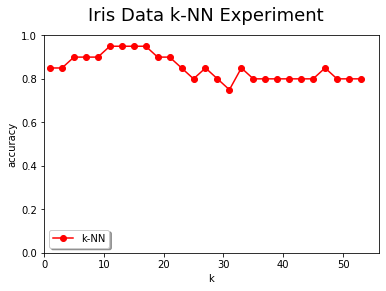

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#reload the data
data = pandas.read_csv('/content/drive/MyDrive/CS167Fall22/Datasets/irisData.csv')

shuffled_data = data.sample(frac=1, random_state = 41)

# create test and training data sets
test_data = shuffled_data.iloc[0:20]
train_data = shuffled_data.iloc[20:]

# explore different values of k
k_vals = range(1,55,2)
kNN_accuracies = []

for k in k_vals:
    predictions = classify_all_kNN(test_data,train_data,k)
    current_accuracy = accuracy(test_data['species'],predictions)
    kNN_accuracies.append(current_accuracy)


plt.suptitle('Iris Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,kNN_accuracies,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,56,0,1])

plt.show()

# Exercise #2:
To Do:
- add more points: add multiple values of k to the graph 
- explain the phenomenon that you observe

# Exercise #3:
To do:
- What happens if you change the testing size? 25? 30?
- What happens if you use a different random number seed (other than 41)?


# Exercise #4 Penguins!!


In [ ]:
def penguin_classify_kNN(new_example,train_data,k):
    # outputs the most commonly-occuring (mode) species of the closeset k training examples 
    # designed to work on the iris data set
    train_data_copy = train_data.copy() #use a copy of the training set just so we don't mess up the original
    train_data_copy['distance_to_new'] = numpy.sqrt(
        (new_example['bill_length_mm']-train_data_copy['bill_length_mm'])**2
        +(new_example['bill_depth_mm']-train_data_copy['bill_depth_mm'])**2
        +(new_example['flipper_length_mm']-train_data_copy['flipper_length_mm'])**2
        +(new_example['body_mass_g']-train_data_copy['body_mass_g'])**2)
    sorted_data = train_data_copy.sort_values(['distance_to_new'])
    #mode() will return most common thing in the closest k examples in the sorted dataframe; iloc will get the actual string of the species
    prediction = sorted_data.iloc[0:k]['species'].mode().iloc[0] 
    return prediction

In [ ]:
def penguin_classify_all_kNN(test_data, train_data, k):
    # INPUT:
    #   test_data: a dataframe of the testing data set
    #   train_data: a dataframe of the training data set
    #   k: an integer
    # OUTPUT:
    #   a pandas.Series of the predicted results
    # for each item in the test_data list, apply the classify_kNN function (also passing the train_data and k)
    # return a pandas.Series of the predicted results
    results = []
    for i in range(len(test_data)):
      #### get a prediction from kNN for test_data at position i
      prediction = penguin_classify_kNN(test_data.iloc[i],train_data,k)
      #### add that prediction to the results list
      results.append(prediction)
    return pandas.Series(results)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#load the data
data = pandas.read_csv('/content/drive/MyDrive/CS167Fall22/Datasets/penguins.csv')

#clean the data -- I'm okay just getting rid of any rows with any null values...
data.dropna(inplace = True)
data.head()


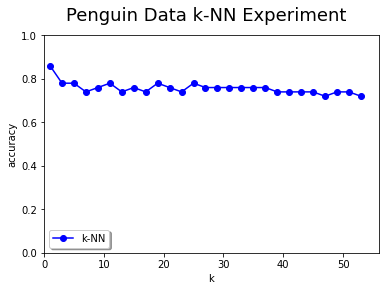

In [ ]:
shuffled_data = data.sample(frac=1, random_state = 41)

# create test and training data sets
test_data = shuffled_data.iloc[0:50]
train_data = shuffled_data.iloc[50:]

# explore different values of k
k_vals = range(1,55,2)
kNN_accuracies = []

for k in k_vals:
    predictions = penguin_classify_all_kNN(test_data,train_data,k)
    current_accuracy = accuracy(test_data['species'],predictions)
    kNN_accuracies.append(current_accuracy)


plt.suptitle('Penguin Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,kNN_accuracies,'bo-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,56,0,1])

plt.show()

okay, but the data should really be normalized...

In [ ]:
# what are the means and standard deviations ?
bill_length_mm_mean = train_data['bill_length_mm'].mean()
bill_length_mm_std = train_data['bill_length_mm'].std()

bill_depth_mm_mean = train_data['bill_depth_mm'].mean()
bill_depth_mm_std = train_data['bill_depth_mm'].std()

flipper_length_mm_mean = train_data['flipper_length_mm'].mean()
flipper_length_mm_std = train_data['flipper_length_mm'].std()

body_mass_g_mean = train_data['body_mass_g'].mean()
body_mass_g_std = train_data['body_mass_g'].std()

In [ ]:
# normalize the testing and training data
train_norm_data = train_data.copy()
test_norm_data = test_data.copy()

# update the columns in train_norm_data 
train_norm_data['bill_length_mm'] = (train_data['bill_length_mm'] - bill_length_mm_mean)/bill_length_mm_std
train_norm_data['bill_depth_mm'] = (train_data['bill_depth_mm'] - bill_depth_mm_mean)/bill_depth_mm_std
train_norm_data['flipper_length_mm'] = (train_data['flipper_length_mm'] - flipper_length_mm_mean)/flipper_length_mm_std
train_norm_data['body_mass_g'] = (train_data['body_mass_g'] - body_mass_g_mean)/body_mass_g_std

test_norm_data['bill_length_mm'] = (test_data['bill_length_mm'] - bill_length_mm_mean)/bill_length_mm_std
test_norm_data['bill_depth_mm'] = (test_data['bill_depth_mm'] - bill_depth_mm_mean)/bill_depth_mm_std
test_norm_data['flipper_length_mm'] = (test_data['flipper_length_mm'] - flipper_length_mm_mean)/flipper_length_mm_std
test_norm_data['body_mass_g'] = (test_data['body_mass_g'] - body_mass_g_mean)/body_mass_g_std



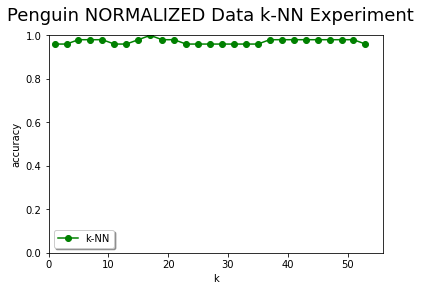

In [ ]:
# explore different values of k
k_vals = range(1,55,2)
kNN_accuracies = []

for k in k_vals:
    predictions = penguin_classify_all_kNN(test_norm_data,train_norm_data,k)
    current_accuracy = accuracy(test_norm_data['species'],predictions)
    kNN_accuracies.append(current_accuracy)


plt.suptitle('Penguin NORMALIZED Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,kNN_accuracies,'go-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,56,0,1])

plt.show()